[参考笔记](https://github.com/shazhongcheng/machine_learing_study/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98%E4%B8%80/%E7%AC%AC%E4%B8%80%E9%83%A8%E5%88%86-%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80%20%E7%AC%AC%E5%85%AB%E7%AB%A0-%E9%99%8D%E7%BB%B4.ipynb)

许多机器学习会涉及到实例许多特征，这会使模型训练非常缓慢。这个问题就像一个诅咒一样困扰着我们，所以我将这个问题称为维度的诅咒<br>
对于这个问题，我们可以通过降维的方式减少特征量，数据降维确实会丢失一些信息，所以，它虽然能够加速训练，但是也会轻微降低模型性能。同时也会让流水线更为复杂，维护难度上升。所以，如果训练太慢，我们首先应该尝试的还是继续使用原始数据，然后再考虑数据降维。<br>
除了加快训练，降维对于数据可视化也是非常有用的。将维度降到两个或三个，就可以在图形上绘制出高纬度训练集，通过视觉来检测模式，常常可以获得一个十分重要的洞察，比如说聚类<br>
接下来将探讨维度的诅咒，大致了解高维空间中发生的事情。然后，我们将介绍两种主要的数据降维方法(投影和流形学习)，并学习现在最流行的三种数据降维技术：PCA、Kernel PCA以及LLE。

In [3]:
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 为了显示中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 维度的诅咒
我们以及习惯三维空间的生活，所以我们很难试图去现象一个高维度的空间，更别说在高维度空间上对物体的结构进行变换。<br>
理论上，通过增大训练集，是训练实例达到足够的密度，是可以解开维度的诅咒的。然而不幸的是，这是呈指数上升的。

# 数据降维的主要方法
常用的数据降维方法有投影和流形学习

## 投影
投影比较好理解，就像用平行光对着墙照一个物体时一样，墙上会留下一个影子，这个二维的影子就是三位的物体的投影。投影的概念和符合我们日常生活，将一个高维度的空间映射到一个低维度。(不是很专业，可能有误)

In [9]:
#下面代码是为画出图8-2
from sklearn.decomposition import PCA
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)

In [6]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [7]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

<ipython-input-8-dfbcb705b175>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
<ipython-input-6-dbc6177a42f4>:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


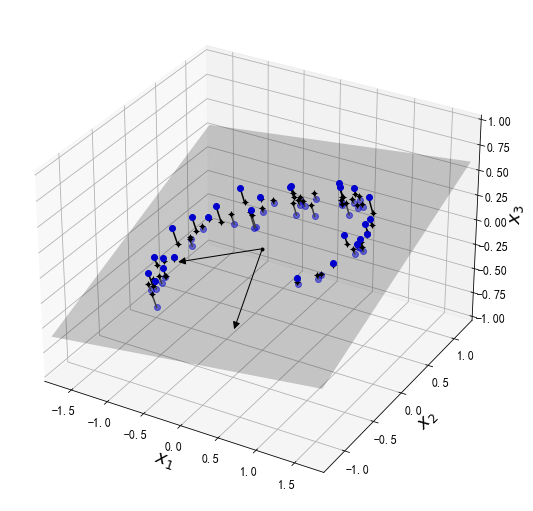

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 7.2))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

# 绘制平面下的点
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)
# 画平面
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
# 画箭头
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
# 原点
ax.plot([0], [0], [0], "k.")

for i in range(m):
    # 连接重建的点和原来点的位置
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
# 在三维上绘制重建的点
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
# 绘制平面上的点
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")

ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Note: If you are using Matplotlib 3.0.0, it has a bug and does not
# display 3D graphs properly.
# See https://github.com/matplotlib/matplotlib/issues/12239
# You should upgrade to a later version. If you cannot, then you can
# use the following workaround before displaying each 3D graph:
# for spine in ax.spines.values():
#     spine.set_visible(False)
plt.tight_layout()
plt.show()

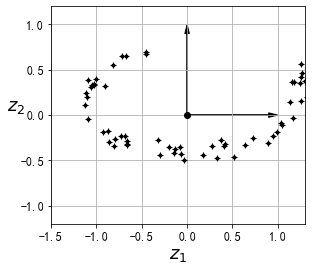

In [10]:
#图8-3（投影后产生的2D数据集）
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
# 绘制降维后的点
ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
# 绘制箭头和原点
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')

ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

不过投影并不总是降维的最佳方法，面对弯曲和转动的数据就会可能效果不好(例如下面的瑞士卷数据集)

In [11]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)   #生成瑞士卷数据集

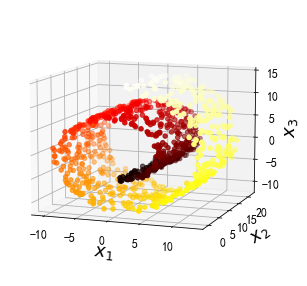

In [15]:
#图8-4
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

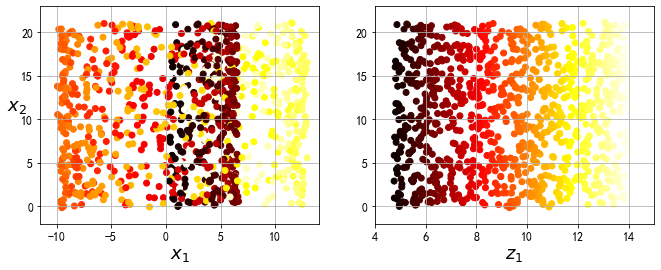

In [16]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

图8-5：投影(左),展开(右)

# 流形学习
显然，刚刚的瑞士卷数据更适合流形学习，瑞士卷数据就是一个二维流形的例子，流形可以看成一个低维度在高维度空间的扭曲，例如二维流形，就是一个平面在一个三位空间的扭曲(观察下图)

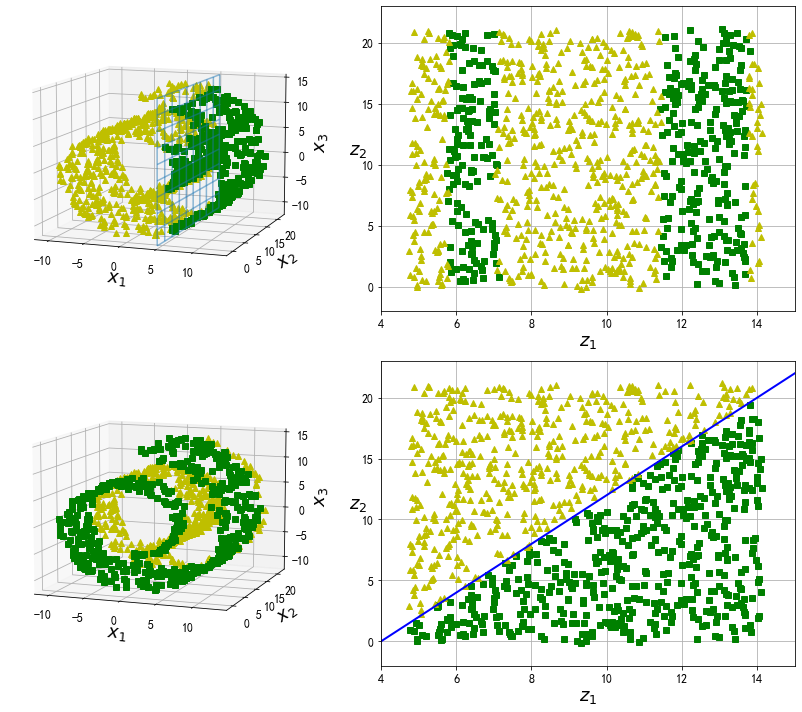

In [17]:
from matplotlib import gridspec
# x轴坐标  y轴坐标  z轴坐标
axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(221, projection='3d')
# x轴=5来切
positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


# fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(222)
# 按照 t轴和x来绘制
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)


# fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(223, projection='3d')
# 沿着y轴切
positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


# fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(224)
# 按照 t轴和x来绘制
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")

plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

降维肯定能加快训练速度，但不一定会使数据集更简单

# PCA
PCA(主成分分析)是迄今为止最流行的降维算法，它先识别出最接近数据的超平面，然后将数据投影其上。

# 保留差异性

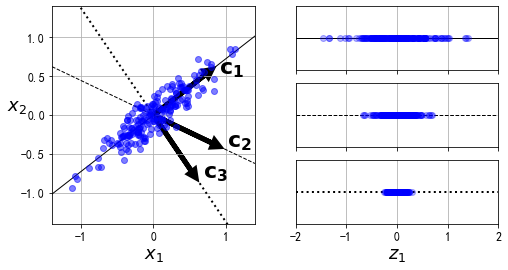

In [18]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
# 随机200个二维点
X = np.random.randn(m, 2) / 10
# 旋转变换一下
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate
# 三种投影方案
u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
# 画投影方向
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
# 画原坐标点
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
# 画箭头
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u2[0], u2[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u2[0] + 0.1, u2[1], r"$\mathbf{c_2}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_3}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

# 画布位置
plt.subplot2grid((3,2), (0, 1))
# 中间的线
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
# 去掉坐标轴
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

# 画布位置
plt.subplot2grid((3,2), (1, 1))
# 中间的线
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

# 画布位置
plt.subplot2grid((3,2), (2, 1))
# 中间的线
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

将训练集投影到低维超平面前，需要选择正确的超平面，如图，C3方向投影保留的差异性较大，而C1方向投影保留的差异性则非常小，我们应该保留更多的差异性以降低训练难度。

# 主成分
主成分可以在训练集中识别出那条轴对差异性的贡献度最高，同时主成分的方向是不稳定的：如果我们稍微打乱训练集，然后重新运行PCA，部分新的主成分可能指向原来相反的方向，但是他们通常还是在同一条轴上的。

可以采用奇异值分解(SVD)来获取主成分矩阵。$X=U\cdot \sum \cdot V^T$
$$
V^T=
\begin{pmatrix}
|  & | & ... & | \\
c_1 & c_2 & ... & c_n \\
|  & | & ... & | 
\end{pmatrix}
$$

In [20]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [21]:
# 中心化
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
# 投影
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [22]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [23]:
# 中心化的点来做降维
W2 = Vt.T[:, :2]
X2D_using_svd = X_centered.dot(W2)

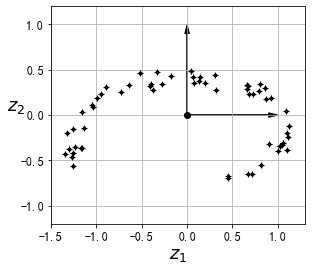

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D_using_svd[:, 0], X2D_using_svd[:, 1], "k+",)
ax.plot(X2D_using_svd[:, 0], X2D_using_svd[:, 1], "k.")
# 坐标轴
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')

ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

# 低纬度投影
一旦确定了所有的主成分，就可以将数据集投影到前d个主成分定义的超平面上，从而将数据集的维度降到d维。

投影：
$$
X_{d_proj}=X\cdot W_d
$$

# 使用sklearn

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

# 方差解释率
表示每个主成分对整个数据集方差的贡献

In [26]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

# 选择正确数量的维度
除了武断的选择要降至的维度数量，通常来说，更好的办法是将靠前的主成分方差解释率求和，直到得到足够大比例的方差(例如95%)。

In [27]:
# 获取全部维度的降维的方差解释率
pca = PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

2

In [28]:
cumsum

array([0.84248607, 0.98880446, 1.        ])

然后我们就可以设置n_components=d,再次训练，或者指定n_components=0.0-1.0之间，这样就不需要重复训练。

In [29]:
pca = PCA(n_components=d)
X2D = pca.fit_transform(X)

此外，还可以将解释方差绘制成关于维度数量的函数，然后根据拐点来设定n_components

# PCA压缩
虽然压缩后图像质量有所影响，但数字部分还比较完好，但占用的空间要少得多。

![jupyter](./图片/PAC压缩.png)

# 增量PCA
前面关于主成分分析的种种实现，问题在于，它需要整个训练集都进入内存，才能运行SVD算法，因此又有了增量PCA，可以将训练集切分成小批量,一次给算法喂一个。

In [66]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

好家伙 还有进度条

或者我们也可以采用 memmap来实现增量PCA

In [69]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [70]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

# 随机PCA
此外，我们还可以采用随机的方式，快速找到前d个主成分的近似值，当d远小于n时，该算法比前面都要快得多。

In [71]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

# 核主成分分析
还记得SVM的核技巧吗？这同样也适用于主成分分析。

In [73]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [74]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

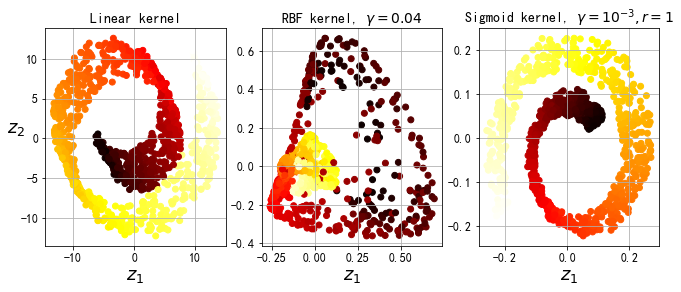

In [75]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
plt.show()

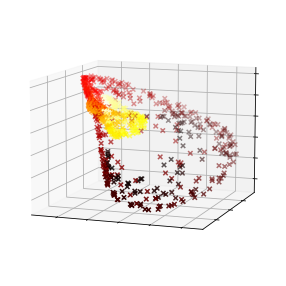

In [76]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.show()

# 选择核函数和调整超参数
由于kPCA是一种无监督的学习算法，因此没有明显的性能指标来帮我们选择最佳的核函数和超参数值。而降维通常是监督式学习任务(例如分类)的准备步骤，所以可以使用网格搜索，来找到使任务性能最佳的核和超参数。

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3,verbose=1,n_jobs=-1)
grid_search.fit(X, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}],
             verbose=1)

In [78]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


<Figure size 432x360 with 0 Axes>

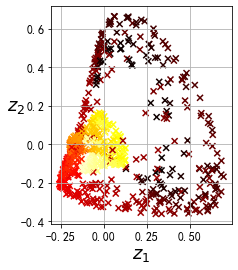

In [79]:
plt.figure(figsize=(6, 5))

X_reduced = grid_search.best_estimator_['kpca'].fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [80]:
# 设置fit_inverse_transform=True
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [81]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576613

# 局部线性嵌入
局部线性嵌入是另一种非常强大的非线性降维技术，不同于之前的算法依赖于投影，它是一种流形学习技术。简单来说，LLE首先测量每个算法如何与其最近的邻居线性相关，然后为训练集寻找一个能最大程度保留这些局部关系的低维表示。

In [82]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [83]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

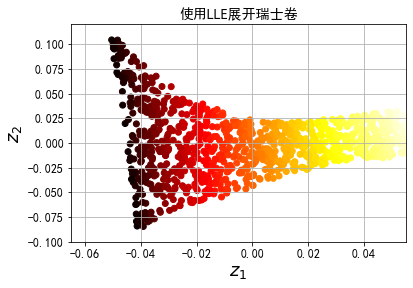

In [85]:
plt.title("使用LLE展开瑞士卷", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

# 其他降维技巧

In [88]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [89]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [90]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

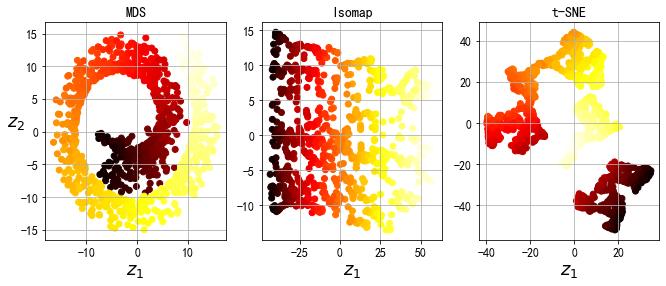

In [92]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

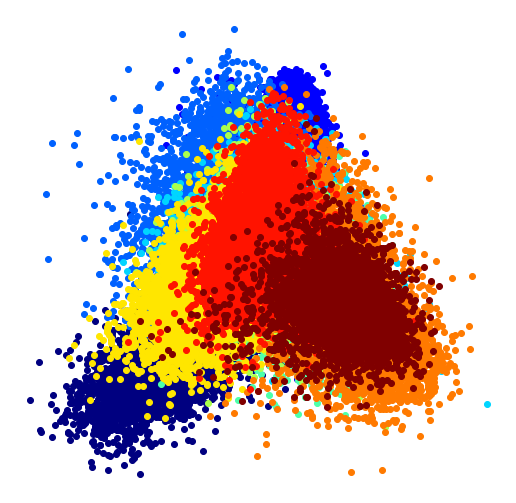

In [94]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in range(0,10):
    plt.scatter(X_reduced_lda[y_mnist == digit, 0], X_reduced_lda[y_mnist == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()